In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 1. Load the dataset
df = pd.read_csv('/content/glass.csv')



In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
col_names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [ ]:
# 2. Exploratory Data Analysis (EDA)
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nSummary statistics:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", Counter(df['Type']))

Dataset shape: (214, 10)

First 5 rows:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Summary statistics:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.79

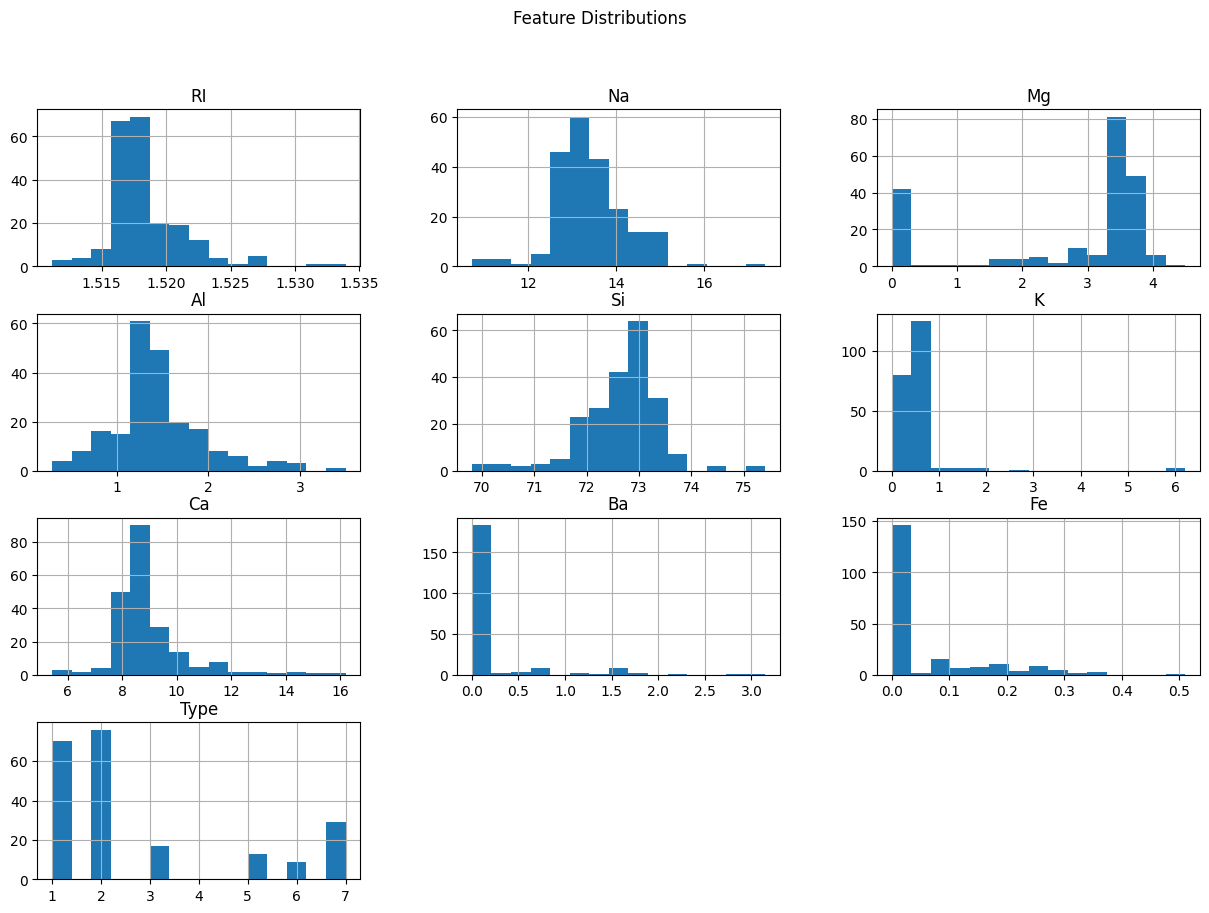

In [ ]:
# 3. Data Visualization
# Histograms
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()


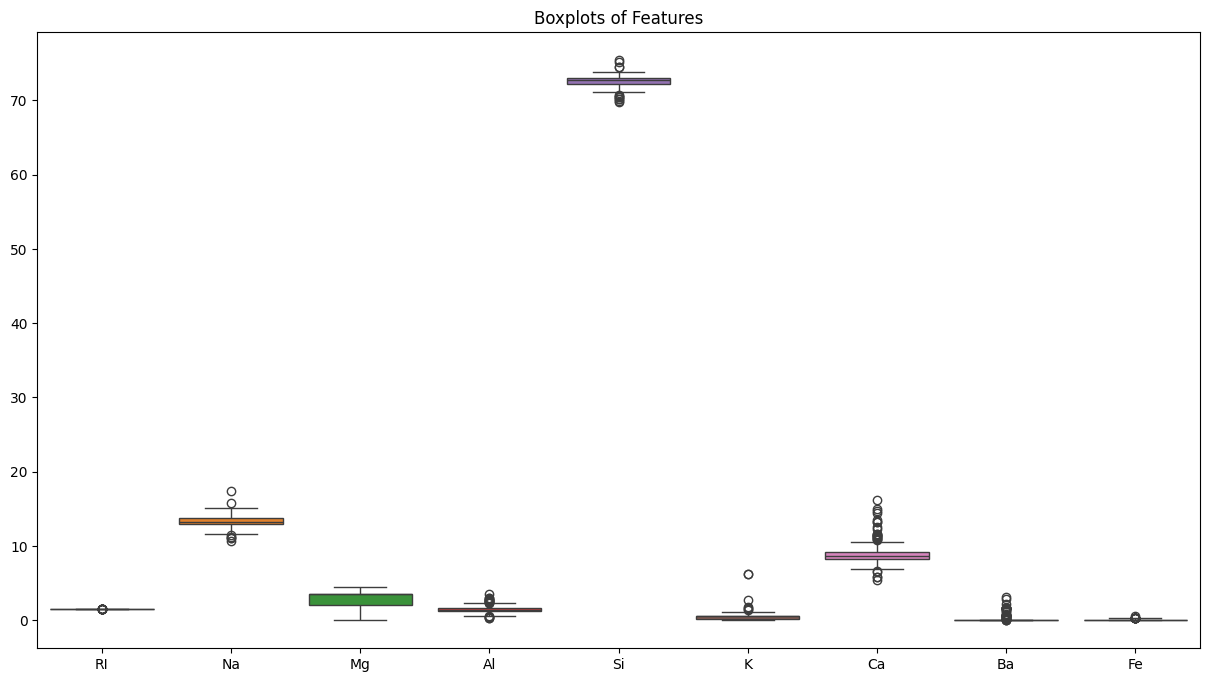

In [ ]:
# Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.iloc[:, :-1])
plt.title('Boxplots of Features')
plt.show()


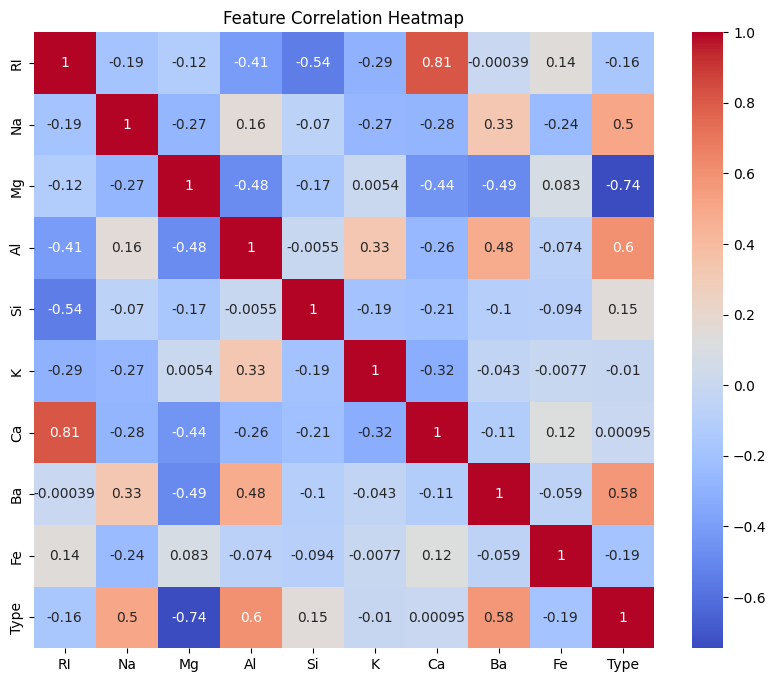

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# 4. Data Preprocessing
# No missing values, all features are numeric

# Features and target
X = df.drop('Type', axis=1)
y = df['Type']


In [ ]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (stratify for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)



In [ ]:
# 5. Random Forest Model
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [ ]:
# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8307692307692308

Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.90      0.84        21
           2       0.90      0.78      0.84        23
           3       0.67      0.40      0.50         5
           5       0.67      1.00      0.80         4
           6       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.83        65
   macro avg       0.80      0.83      0.80        65
weighted avg       0.84      0.83      0.83        65


Confusion Matrix:
 [[19  1  1  0  0  0]
 [ 2 18  0  2  1  0]
 [ 3  0  2  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  0  8]]


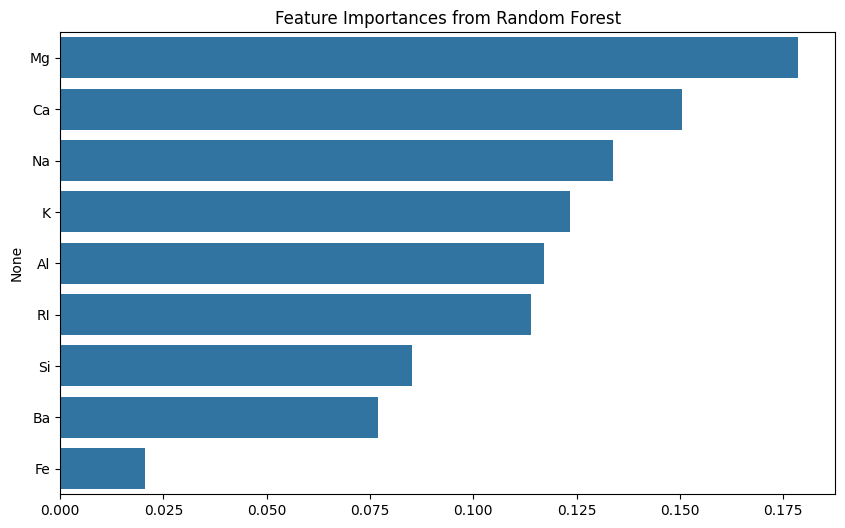

In [ ]:
# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Feature Importances from Random Forest')
plt.show()

In [ ]:
# Bagging (use estimator)
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(class_weight='balanced'),
    n_estimators=100,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
print("\n=== Bagging Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print("Classification Report:\n", classification_report(y_test, y_pred_bag))

# AdaBoost (use estimator)
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, class_weight='balanced'),
    n_estimators=100,
    random_state=42
)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)
print("\n=== AdaBoost Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))



=== Bagging Results ===
Accuracy: 0.8153846153846154
Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.95      0.89        21
           2       0.85      0.74      0.79        23
           3       0.50      0.40      0.44         5
           5       0.60      0.75      0.67         4
           6       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.82        65
   macro avg       0.76      0.79      0.76        65
weighted avg       0.82      0.82      0.81        65


=== AdaBoost Results ===
Accuracy: 0.35384615384615387
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.42      0.78      0.55        23
           3       0.00      0.00      0.00         5
           5       0.20      1.00      0.33         4
           6       0.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import f1_score

# Calculate metrics for Bagging
bagging_accuracy = accuracy_score(y_test, y_pred_bag)
bagging_f1_macro = f1_score(y_test, y_pred_bag, average='macro')
bagging_f1_weighted = f1_score(y_test, y_pred_bag, average='weighted')

# Calculate metrics for AdaBoost
adaboost_accuracy = accuracy_score(y_test, y_pred_ada)
adaboost_f1_macro = f1_score(y_test, y_pred_ada, average='macro')
adaboost_f1_weighted = f1_score(y_test, y_pred_ada, average='weighted')

# Create a comparison DataFrame
comparison = pd.DataFrame({
    'Method': ['Bagging', 'AdaBoost'],
    'Accuracy': [bagging_accuracy, adaboost_accuracy],
    'Macro F1-score': [bagging_f1_macro, adaboost_f1_macro],
    'Weighted F1-score': [bagging_f1_weighted, adaboost_f1_weighted]
})

# Display the comparison box
print("\n=== Model Comparison ===")
print(comparison.to_string(index=False))



=== Model Comparison ===
  Method  Accuracy  Macro F1-score  Weighted F1-score
 Bagging  0.815385        0.764836           0.812056
AdaBoost  0.353846        0.179798           0.241212


1. Bagging vs. Boosting
Bagging (Bootstrap Aggregating):

Purpose: Reduces variance and prevents overfitting.

Method: Trains multiple models independently on random bootstrapped subsets of data.

Final Prediction: Uses majority vote (classification) or average (regression).

Example: Random Forest.

Advantage: Stable and less prone to overfitting.

Boosting:

Purpose: Reduces bias and builds a strong model from weak learners.

Method: Trains models sequentially, each one focusing more on the errors of the previous one.

Final Prediction: Weighted combination of weak learners.

Examples: AdaBoost, Gradient Boosting, XGBoost, LightGBM.

Advantage: High accuracy if tuned well, but more prone to overfitting.

Key Difference:

Bagging = Parallel, reduces variance.

Boosting = Sequential, reduces bias.

2. How to Handle Imbalanced Data
A. Data-Level Techniques

Oversampling the minority class (e.g., using SMOTE).

Undersampling the majority class (randomly removing examples).

B. Algorithm-Level Techniques

Use models that support class weights, like Logistic Regression, Random Forest (class_weight='balanced').

Modify loss functions to penalize misclassification of the minority class more.

C. Use Proper Evaluation Metrics

Use Precision, Recall, F1-score, ROC-AUC instead of just Accuracy.

Check confusion matrix to analyze true positives and false negatives.

D. Use Ensemble Techniques

Balanced Random Forest, EasyEnsemble, or XGBoost with scale_pos_weight parameter are effective.

